# Crime and the Human Development Index

## Correlation Between Number of Cameras and Crime Rate

Even though crime prevention is the primary goal of CCTV, its efficacy is highly debatable, as illustrated by the graph below.

In [1]:
%%html
<style>
.cell_output {
    filter: drop-shadow(0px 0px 5px rgba(0, 0, 0, 0.1));
    -webkit-backdrop-filter: blur(0);
}

.plotly-graph-div {
    border-radius: 10px;
    overflow: hidden;
    border: 1px solid #105fa2;
}
</style>

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

cctv = pd.read_csv("datasets/cctv.csv")

cctv_west = cctv[cctv["Country"] != "China"]

# Define a new column for color based on the condition
cctv_west['color'] = cctv_west['Country'].apply(lambda x: 'orange' if x == 'India' else 'blue')
color_map = {'India': 'orange', 'Other': 'blue'}

# Create the scatterplot
fig = px.scatter(
    cctv_west,
    x='# of CCTV Cameras per 1,000 People',
    y='Crime Index 2023',
    hover_name='City',
    hover_data={'Country': True},
    color = 'color',
    title='Crime Index vs # of CCTV Cameras per 1,000 People<br><sup>There is no correlation between the amount of cameras and a lower crime index.</sup>'
)

# Customize hover label formatting
fig.update_traces(
    hovertemplate='City: %{hovertext}<br>Country: %{customdata[0]}<br>Crime Index: %{x}<br># of CCTV Cameras per 1,000 People: %{y}'
)

fig.update_layout(
    height=500,
    legend_title='Country',
)

newnames = {'blue' : 'Others', 'orange' : 'India'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    #margin={'b': 106, 't': 100}
)

# Show the plot
fig.show()

The global outlier China is excluded to better illustrate the bare relation between increasing surveillance and safety. Even with China left out, two cities stick out in the number of CCTV cameras per 1000 people: Indore and Hyderablad, both located in India. However, other cities in India, colored in orange, have around the same or a lower crime rate with fewer cameras, indicating that even within the same country, more cameras don’t necessarily make a difference. 

An explanation for this is that most video surveillance systems are still human-controlled, meaning that human operators watch and assess the video recordings (Ratcliffe, 2006). Because the number of cameras outnumbers the monitoring screens, and most CCTV cameras operate daily for 24 hours, it is difficult for security personnel to keep up with crime through this surveillance alone (Elharrouss et al., 2021; Zabłocki et al., 2014).

## Introducing the Human Development Index

Whether CCTV works for its intended purpose remains imprecise: it might be a way to only combat crimes of a certain type, but definitely not enough to reduce overall crime rates. Therefore, **governments should focus less on surveillance, and more on battling underlying issues that might cause crime.** For this, we will look at the Human Development Index (HDI) to dive deeper into diverse demographic and socio-economic factors that might predict crime rates

## Global Annual Reports of the Human Development Index

The HDI measures average achievement of three key dimensions: a long and healthy life, knowledge reproduction, and living standards. Indicators of these dimensions evolve around aspects, like life expectancy, years of schooling, and GNI. The higher the HDI index value, the more developed a country is.

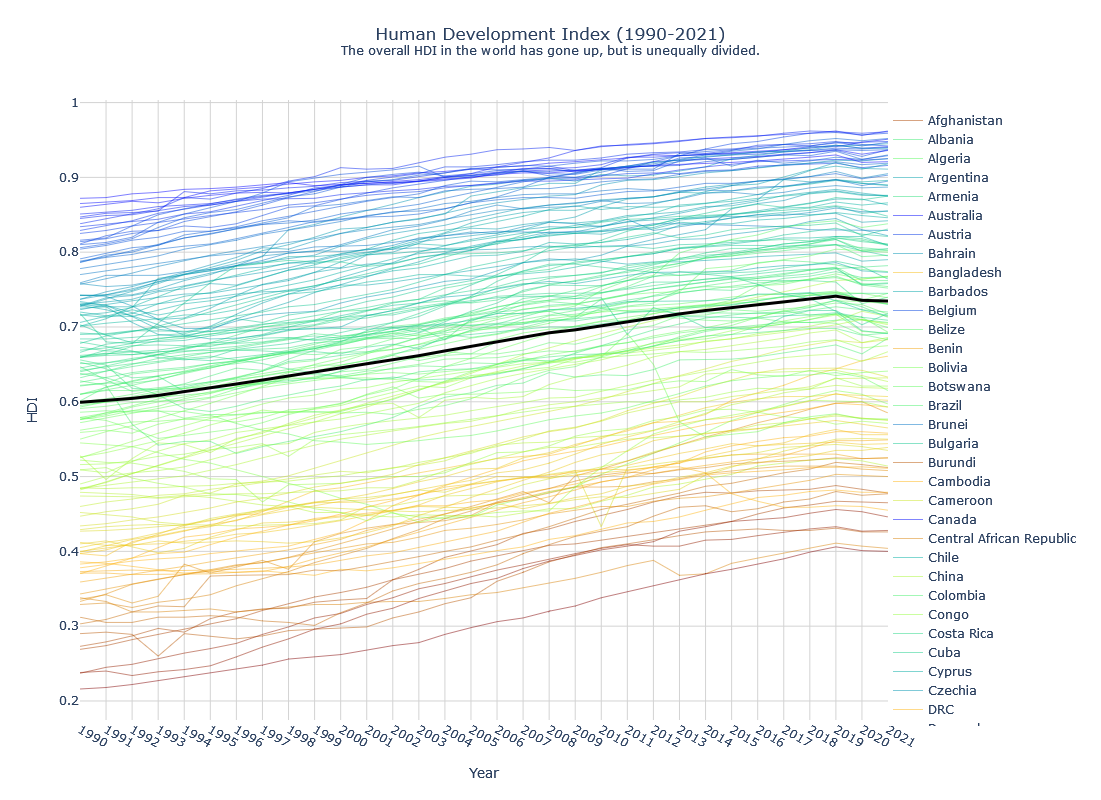

In [8]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

HDI_full = pd.read_csv("datasets/Human Development Index.csv")

HDI_full = HDI_full.groupby('Country').first()

columns = ["Human Development Index (" + str(i) + ")" for i in range(1990, 2022)]

# filter data 2021
HDI = HDI_full[columns]

# Rename some countries for clarity
HDI.rename({'The Democratic Republic of the Congo':'DRC'}, inplace = True)
HDI = HDI.sort_index()

# Filter the dataframe to include only the required columns
filtered_HDI = HDI.dropna()

hdi_data = filtered_HDI

# Normalize the first year's HDI values for color mapping
first_year = hdi_data.columns[1]
first_year_values = hdi_data[first_year].values
norm = plt.Normalize(first_year_values.min(), first_year_values.max())
colors = plt.cm.rainbow(norm(first_year_values))

# Create the plotly figure
fig = go.Figure()

# year legend
years = [str(year) for year in range(1990, 2022)]

# Add traces for each country with color mapping based on the first year's HDI value
for i in range(len(hdi_data.index)):
    index = i
    row = hdi_data.iloc[i]
    country_color = 'rgb(' + str(int(256 - (colors[index][0] * 255)))\
    + "," + str(int((colors[index][1] * 255))) + "," + str(int(256 - (colors[index][2] * 255))) + ")"
    country_data = row[:].dropna()
    fig.add_trace(go.Scatter(
        x=years,
        y=country_data,
        mode='lines',
        line=dict(width=0.5, color=country_color),
        showlegend=True,
        name = hdi_data.index[i]
    ))


# Calculate and plot the world average HDI
world_avg = hdi_data.iloc[:, :].mean(axis=0)
fig.add_trace(go.Scatter(
    x=years,
    y=world_avg,
    mode='lines',
    line=dict(width=3, color='black'),
    name='World Mean'
))

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='HDI',
    showlegend=True,
    legend=dict(orientation="v", yanchor="top", y=0.99, xanchor="left", x=1),
    plot_bgcolor='white',
    autosize = True,
    height = 800,
    title={
        'text' : 'Human Development Index (1990-2021)<br><sup>The overall HDI in the world has gone up, but is unequally divided.</sup>',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Customize hover label formatting
fig.update_traces(
    hovertemplate='Year: %{x}<br>HDI: %{y}'
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the figure
fig.show()


As seen in the graph, there is an overall global increase over time of overall HDI-levels per country. However, human development is unequally distributed over the nations, representing global inequalities. We will delve more into what this metric means for the crime index for a country.

## Analysis of Human Development Index and Crime Index

The graph below displays the correlation between the HDI index and the crime index. The values ‘Low’, ‘Medium’ and ‘High’ correspond to crime indices under 40, 40-60 and above 60, respectively. For the HDI index, each category contains a roughly equal number of countries. 

In [4]:
df_development = pd.read_csv('datasets/Human Development Index.csv')
df_world = pd.read_csv('datasets/crime-rate-by-country-2023.csv')

color_map = {'Low': '#00cc96', 'Medium': '#fecb52', 'High': '#f673b0'}

# Filter and rename columns
df_development_filtered = df_development[['Country', 'HDI Rank (2021)', 'Human Development Index (2021)', 'Inequality in income (2021)']]
df_development_filtered = df_development_filtered.rename(columns={'Country': 'country'})

# Merge dataframes
hdi_df = df_development_filtered[['country', 'Human Development Index (2021)']]
merged_hdi_df = pd.merge(df_world, hdi_df, on='country', how='inner')

# Define bins and labels for crimeIndex and Human Development Index (2021)
bins_crime = [-float('inf'), 40, 60, float('inf')]
labels_crime = ['Low', 'Medium', 'High']
bins_hdi = [merged_hdi_df['Human Development Index (2021)'].min(), 
            merged_hdi_df['Human Development Index (2021)'].quantile(1/3), 
            merged_hdi_df['Human Development Index (2021)'].quantile(2/3), 
            merged_hdi_df['Human Development Index (2021)'].max()]
labels_hdi = ['Low', 'Medium', 'High']

# Apply binning
merged_hdi_df['crimeIndex'], bins_cut_crime = pd.cut(merged_hdi_df['crimeIndex'], bins=bins_crime, labels=labels_crime, retbins=True)
merged_hdi_df['Human Development Index (2021)'], bins_cut_hdi = pd.cut(merged_hdi_df['Human Development Index (2021)'], bins=bins_hdi, labels=labels_hdi, retbins=True)

# Drop NaN values if any
merged_hdi_df = merged_hdi_df.dropna(subset=['crimeIndex', 'Human Development Index (2021)'])

# Create parallel categories plot
parcat = go.Parcats(dimensions=[
                    {'label': 'HDI in 2021', 'values': merged_hdi_df['Human Development Index (2021)'], 'categoryorder': 'array', 'categoryarray': ['Low', 'Medium', 'High']},
                    {'label': 'Crime index', 'values': merged_hdi_df['crimeIndex'], 'categoryorder': 'array', 'categoryarray': ['Low', 'Medium', 'High']}
                    ],
                    line=dict(color=merged_hdi_df['crimeIndex'].map(color_map)))

gdi_figure = go.Figure(parcat)
gdi_figure.update_layout(
    title={
    'text': 'Analysis of Crime Index and Human Development Index (2021)<br><sup>Countries with a high HDI usually have a low crime index, and vice versa.</sup>',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 500)
gdi_figure.show()

This graph indicates how low-crime indexed countries likely have higher rates of HDI, and vice versa. The data for the HDI is from 2021, and the crime index data is from 2023, to show how structural and demographic dimensions can be assessed as continuous predictors of criminal opportunity. 

## A Cross-National Comparison of Crime and the Human Development Index

In [5]:
#load datasets
crime = pd.read_csv("datasets/crime-rate-by-country-2023.csv")
HDI = pd.read_csv("datasets/Human Development Index.csv")

# index = country
crime = crime.groupby('country').first()
HDI = HDI.groupby('Country').first()

# filter data 2021
stats_2021 = [col for col in HDI.columns if '2021' in col]
HDI_2021 = HDI[stats_2021]

HC = HDI_2021.copy()
HC = HC.loc[:, [#'HDI Rank (2021)',
             'Human Development Index (2021)',
             'Life Expectancy at Birth, female (2021)',
            'Life Expectancy at Birth, male (2021)',
            'Life Expectancy at Birth (2021)',
             'Gross National Income Per Capita, female (2021)',
             'Gross National Income Per Capita, male (2021)',
            'Gross National Income Per Capita (2021)',
             'Coefficient of human inequality (2021)',
             'Overall loss (%) (2021)',
             'Inequality in life expectancy (2021)',
             'Inequality in income (2021)',
             'Gender Inequality Index (2021)',
             'Adolescent Birth Rate (births per 1,000 women ages 15-19) (2021)']]

HC.rename(columns = {'Human Development Index (2021)': 'HDI',
                     'Life Expectancy at Birth (2021)': 'Life Expectancy at Birth',
                     'Life Expectancy at Birth, male (2021)' : 'Life Expectancy at Birth, male',
                     'Life Expectancy at Birth, female (2021)' : 'Life Expectancy at Birth, female',
                    'Gross National Income Per Capita (2021)' : 'GNI per capita',
                     'Gross National Income Per Capita, male (2021)' : 'GNI per capita, male',
                      'Gross National Income Per Capita, female (2021)' : 'GNI per capita, female',
                     'Inequality-adjusted Human Development Index (2021)' : 'Inequality-adjusted HDI',
                    'Coefficient of human inequality (2021)' : 'Coefficient of human inequality',
                    'Overall loss (%) (2021)' : 'Overall loss', 'Inequality in life expectancy (2021)' : 'Inequality in life expectancy',
                    'Inequality in income (2021)' : 'Inequality in income',
                    'Gender Inequality Index (2021)' : 'Gender Inequality Index',
                    'Adolescent Birth Rate (births per 1,000 women ages 15-19) (2021)' : 'Adolescent Birth Rate'}, inplace=True)

# standardize data
HC_standardized = 2 * (HC - HC.mean()) / (HC.max() - HC.min())

HCC = crime.join(HC_standardized)
HCC = HCC.drop(columns=['rank', 'pop2023'])

low5 = HCC.nsmallest(6, 'crimeIndex')
high5 = HCC.nlargest(5, 'crimeIndex')

df = pd.concat([low5, high5])
df = df.drop("Taiwan", axis='index')

df = df.drop(columns=['crimeIndex'])

df = df.T

HDIfig = go.Figure(data=go.Heatmap(z=df.values,
                                   x=df.columns,
                                   y=df.index,
                                   colorscale='RdBu',
                                   zmid=0,
                                   colorbar=dict(title='values', titleside='right')))

# Update layout for better visualization
HDIfig.update_layout(
    title={
        'text': 'Standardized HDI indicators and low/high crime rates<br><sup>Top 5 countries with the lowest crime rate on the left,<br>and the top 5 countries with the highest crime right on the right.</sup>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Countries with lowest and highest crime rates',
    yaxis_title='Crime predictors',
    xaxis=dict(tickmode='array', tickvals=list(range(len(df.columns))), ticktext=df.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(df.index))), ticktext=df.index)
)

HDIfig.update_layout(
    height=500
)

HDIfig.add_annotation(x=-0.37, y=-0.10,
                   xref="paper", yref="paper",
                   align='left',
                   xanchor='left', yanchor='bottom',
                   showarrow=False,
                   text='HDI values from 2021.'
                  )

# Show the interactive heatmap
HDIfig.show()

The color-coordination of this map visualizes how low-crime countries score higher on overall GNI and life expectancy at birth. Low-crime also corresponds with lower values of human development inequality, overall loss in HDI, and adolescent birth rates.

These points indicate how crime rates are results of poverty. For example, a low life expectancy is most likely the cause of insufficient access to healthcare. Through lacking healthcare funds, chances are higher there is shortcoming financial aid for other developmental needs - forcing illegal activity to meet them.

These cross-national predictive patterns show how combating these structural issues might help combat crime. This implies how the prevention of illegal activity cannot be encountered by surveillance technologies only, as the pressure of unfortunate demographic dimensions outweigh the potential risk one might take for getting caught.

## Analysis of Legal Enforcement, Crime, GNI and Human Development Index

To further understand crime rates in relation to the human development index, there is a need to consider whether every country reacts upon crime the same way. This consideration is illustrated by the Rule of Law metric, which encapsulates the question whether all laws are transparently, independently, impartially and equally enforced.

In [6]:
hfi = pd.read_csv("datasets/hfi-2023.csv")
crime = pd.read_csv("datasets/crime-rate-by-country-2023.csv")

hfi2021 = hfi[hfi["year"] == 2021]
hfi2021.rename(columns = {'countries': 'country'}, inplace = True)
crimehfi = crime.join(hfi2021.set_index('country'), on='country', how = "inner")

HDI = pd.read_csv("datasets/Human Development Index.csv")
HDI_score = HDI[["Country", 'Human Development Index (2021)', 'Gross National Income Per Capita (2021)']].dropna()
HDI_score.rename(columns = {'Country': 'country', 'Human Development Index (2021)' : 'HDI', 'Gross National Income Per Capita (2021)': 'GNI per Capita'}, inplace = True)

crimehdfi = crimehfi.join(HDI_score.set_index('country'), on='country', how = "inner")

custom_color_scale = [
    [0.0, 'rgb(107,0,32)'],
    [0.3, 'rgb(230,130,100)'],
    [0.5, 'rgb(255, 255, 170)'],
    [0.7, 'rgb(150, 200, 225)'],
    [1.0, 'rgb(6,49,100)']
]

# Create scatterplot
fig = px.scatter(crimehdfi, 
                 x='crimeIndex', 
                 y='ef_legal', 
                 color='HDI',
                size='GNI per Capita',  # Use GDP_per_capita for dot sizes
                 size_max=20,  # Maximum size of the dots
                 color_continuous_scale= custom_color_scale,  # You can choose any color scale
                 title='Crime Index vs. Legal Enforcement<br><sup>A higher Rule of Law score correlates with less crime, a higher HDI and GNI.</sup>',
                 labels={'crimeIndex': 'Crime Index', 'ef_legal': 'Rule of Law'},
                 trendline='ols',
                 hover_name='country')

fig.update_layout(
    height=500,
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='rgba(152,214,255,0.1)',  # background color
    xaxis=dict(
        gridcolor='lightgrey',  # Set x-axis gridline color
        zerolinecolor='grey'  # Set x-axis zero line color
    ),
    yaxis=dict(
        gridcolor='lightgrey',  # Set y-axis gridline color
        zerolinecolor='grey'  # Set y-axis zero line color
    ),
)

fig.add_annotation(x=1.12, y=-0.10,
                   xref="paper", yref="paper",
                   align='right',
                   xanchor='right', yanchor='bottom',
                   showarrow=False,
                   text='Size of a bubble shows the GNI per capita.'
                  )

# Show the figure
fig.show()

The above graph shows how higher scores on the Human Development Index correspond with fairer law enforcement. These high enforcement rates imply the fact that crime is more likely to be acted upon, since it’s less likely that law enforcement is corrupt. Interestingly, the countries that score high on both measures are more likely to have higher rates of national income - as indicated by the size of the bubbles in the plot. It is likely that countries with a high national income have more money to provide basic needs for its citizens, including better law enforcement. 